In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

import torch 
from torch import nn
from torchinfo import summary

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split



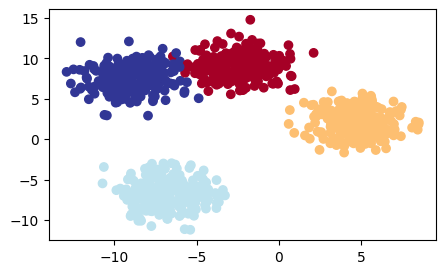

In [2]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#hyperparameter for data creation
x_blob, y_blob = make_blobs(n_samples = 1000, 
                            n_features = NUM_FEATURES, 
                            centers = NUM_CLASSES, 
                            cluster_std = 1.5, 
                            random_state = RANDOM_SEED)

#turning data into tensors 
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


#splitting the dataset into training set and testing set 
x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob, 
                                                                        y_blob, 
                                                                        test_size = 0.2, 
                                                                        random_state = RANDOM_SEED)

x_blob_train.shape, x_blob_test.shape, y_blob_train.shape, y_blob_test.shape   #shapes of splits

#plotting the dataset 
plt.figure(figsize = (5, 3))       
plt.scatter(x_blob[:, 0], 
            x_blob[:, 1], 
            c = y_blob, 
            cmap = plt.cm.RdYlBu)

In [3]:
#multi-class classification model

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        """Initializes multi-class classification model.
        
        Args:
           input_features = number of input features to the model 
           output_features = numbrt of output features 
           hidden units = number of hidden units between the layers , default is set to 8
        
        Returns :
        
        Example :
        
        """
        
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units), 
            nn.ReLU(), 
            nn.Linear(in_features = hidden_units, out_features = hidden_units), 
            nn.ReLU(), 
            nn.Linear(in_features = hidden_units, out_features = output_features)
        )
        
    def forward(self, x):
        return self.linear_layer_stack(x)
        
model = BlobModel(input_features = 2, 
                  output_features = 4, 
                  hidden_units = 8)

model, 

summary(model)

Layer (type:depth-idx)                   Param #
BlobModel                                --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       24
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       72
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       36
Total params: 132
Trainable params: 132
Non-trainable params: 0

In [4]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [5]:
#loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model.parameters(), 
                            lr = 0.1)

In [6]:
model.eval()
with torch.inference_mode():
    y_logits = model(x_blob_test)
    
y_logits[:10]                                      #logits

tensor([[-0.0206,  1.0103,  0.0077, -0.0085],
        [ 0.2006, -0.0421, -0.6279, -0.6921],
        [ 0.2585,  0.1254, -0.1184, -0.7053],
        [-0.1072,  0.7895, -0.1026, -0.0855],
        [ 0.0932,  0.4381, -0.3090, -0.0994],
        [ 0.2244, -0.0873, -0.7231, -0.7278],
        [ 0.0955,  0.2223, -0.1628, -0.4757],
        [ 0.0767,  0.2089, -0.4474, -0.3064],
        [ 0.3789,  0.0188, -0.1071, -0.8171],
        [ 0.0816,  0.2932, -0.3934, -0.2311]])

In [7]:
y_pred_probs = torch.softmax(y_logits, dim = 1)                  #logits -> prediction_probabilities
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.0206,  1.0103,  0.0077, -0.0085],
        [ 0.2006, -0.0421, -0.6279, -0.6921],
        [ 0.2585,  0.1254, -0.1184, -0.7053],
        [-0.1072,  0.7895, -0.1026, -0.0855],
        [ 0.0932,  0.4381, -0.3090, -0.0994]])
tensor([[0.1711, 0.4797, 0.1760, 0.1732],
        [0.3801, 0.2982, 0.1660, 0.1557],
        [0.3398, 0.2975, 0.2331, 0.1296],
        [0.1825, 0.4475, 0.1834, 0.1866],
        [0.2561, 0.3615, 0.1713, 0.2112]])


In [8]:
y_preds = torch.argmax(y_pred_probs, dim = 1)                    #prediction_probabilites -> predictions_labels
y_preds

tensor([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1])

In [13]:
def accuracy_fn(y_true, y_pred):
    correct = (y_pred == y_true).sum().item()
    total = len(y_true)
    accuracy = correct / total
    return accuracy


In [14]:
torch.manual_seed(42)

epochs = 100

x_blob_train, y_blob_train = x_blob_train, y_blob_train
x_blob_test, y_blob_test = x_blob_test, y_blob_test

for epoch in range(epochs):
    model.train()
    
    y_logits = model(x_blob_train)
    
    y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
    
    #loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true = y_blob_train,
                      y_pred = y_pred)
    
    #optimizer and loss function 
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    #testing
    model.eval()
    with torch.inference_mode():
        test_logits = model(x_blob_test)
        test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
        
        #test accuracy / loss
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true = y_blob_test,
                               y_pred = test_preds)
        
        
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss: .4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss:  1.3096, Acc: 0.34 | Test Loss: 1.1203, Test Acc: 0.68%
Epoch: 10 | Loss:  0.4975, Acc: 0.99 | Test Loss: 0.4599, Test Acc: 0.99%
Epoch: 20 | Loss:  0.1574, Acc: 0.99 | Test Loss: 0.1381, Test Acc: 0.99%
Epoch: 30 | Loss:  0.0796, Acc: 0.99 | Test Loss: 0.0684, Test Acc: 0.99%
Epoch: 40 | Loss:  0.0569, Acc: 0.99 | Test Loss: 0.0470, Test Acc: 0.99%
Epoch: 50 | Loss:  0.0466, Acc: 0.99 | Test Loss: 0.0371, Test Acc: 0.99%
Epoch: 60 | Loss:  0.0408, Acc: 0.99 | Test Loss: 0.0315, Test Acc: 0.99%
Epoch: 70 | Loss:  0.0372, Acc: 0.99 | Test Loss: 0.0279, Test Acc: 0.99%
Epoch: 80 | Loss:  0.0347, Acc: 0.99 | Test Loss: 0.0254, Test Acc: 0.99%
Epoch: 90 | Loss:  0.0329, Acc: 0.99 | Test Loss: 0.0235, Test Acc: 0.99%


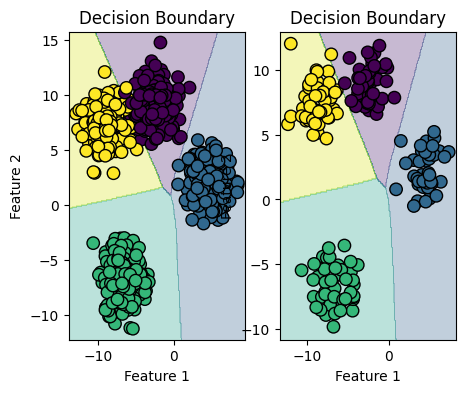

In [19]:

def plot_decision_boundary(model, X, y):
    assert X.shape[1] == 2
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()])).detach().numpy()
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha = 0.3)
    plt.scatter(X[:, 0], X[:, 1], c = y, 
                edgecolors = 'k',
                marker = 'o',
                s = 80,
                linewidth = 1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

plt.figure(figsize=(5, 4))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, x_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, x_blob_test, y_blob_test)

plt.show()
